# Player D Report

## Section 1: Performing Correlation on all Biomechanical Markers Irrelevant of Pitch Type Using *.corr()*

### Findings Summary (Average)
Player D had many strong correlated markers. However, player D's sample size is too small for us to trust these markers. Player D only had fatigue scores calculated for five games, but one of those games (2022-09-20) was not recorded in the pitching mechanics. Therefore, only four of his games had recorded fatigue scores.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import csv files as dataframes 
fatigue = pd.read_csv('fatigue_index.csv', index_col=False)
pitching = pd.read_csv('pitching_mechanics.csv', index_col=False)

In [3]:
# drop rows with values = NaN
fatigue.dropna(inplace=True)
pitching.dropna(inplace=True)

In [4]:
fatigue.head()

,player_id,report_date,game_date,score,last_outing_pitches,pitch_last_4_days,consec,cumulative_inning_pitched
0,pitcher A,2022-04-09,2022-04-01 00:00:00.000000 UTC,0.000000,33.0,0.0,0,0.0
1,pitcher A,2022-04-10,2022-04-01 00:00:00.000000 UTC,0.000000,33.0,0.0,0,0.0
2,pitcher A,2022-04-11,2022-04-10 00:00:00.000000 UTC,12.157287,16.0,16.0,1,2.0
3,pitcher A,2022-04-12,2022-04-10 00:00:00.000000 UTC,5.269455,16.0,16.0,1,2.0
4,pitcher A,2022-04-13,2022-04-12 00:00:00.000000 UTC,17.126998,21.0,37.0,2,3.0


In [5]:
# convert to datetime and format as 'YYYY-MM-DD'
# necessary to join data later
fatigue['game_date'] = pd.to_datetime(fatigue['game_date'].str.replace(" UTC", "", regex=False)).dt.strftime('%Y-%m-%d')

In [6]:
# filter to create two new dataframes for specifically for player D
player_d_fatigue = fatigue[fatigue['player_id'] == 'pitcher D']
player_d_pitching = pitching[pitching['player_id'] == 'pitcher D']

In [7]:
player_d_pitching.head()

,player_id,game_date,pitcher_throws,pitch_release_velocity,pitch_spin_rate,inning,pitch_type,hip_shoulder_separation_at_footstrike,pitching_shoulder_abduction_at_footstrike,pitching_shoulder_horizontal_abduction_at_footstrike,...,hip_internal_rotation_external_rotation_lead_leg_at_release,knee_flexion_extension_drive_leg_at_release,knee_flexion_extension_lead_leg_at_release,trunk_forward_bend_at_release,trunk_side_bend_at_release,trunk_rotation_at_release,pelvis_rotation_at_release,arm_slot_degree_at_release,max_pitching_shoulder_external_rotation,max_hip_shoulder_separation
2364,pitcher D,2022-04-07,right,86.771303,1887.550746,4,changeup,-13.178075,87.441280,43.352835,...,-5.220403,31.653964,23.159462,5.500568,40.410011,116.054976,54.057152,65.0,-183.839035,-30.853988
2365,pitcher D,2022-04-07,right,92.989021,2094.127629,1,sinker,-12.675403,89.321043,45.432799,...,12.596081,33.110947,9.652965,5.641743,42.944527,115.386316,58.529399,65.0,-177.189980,-17.334760
2366,pitcher D,2022-04-07,right,93.638730,2170.645916,3,sinker,-11.816332,87.837329,42.860680,...,29.384150,30.851439,7.865611,4.765610,44.395303,120.316402,56.299436,67.0,-176.143261,-25.357226
2367,pitcher D,2022-04-07,right,93.615859,2167.785817,2,sinker,-17.547942,87.404138,41.781533,...,47.470976,31.970536,5.054860,3.826082,44.543639,117.410041,57.111967,64.0,-172.528738,-25.534964
2368,pitcher D,2022-04-07,right,93.196473,2212.944350,3,sinker,-16.827960,87.819747,44.724613,...,6.640748,32.735152,18.669748,5.519313,44.801077,117.727540,57.620304,66.0,-178.873477,-25.329295


In [8]:
player_d_fatigue.head(20)

,player_id,report_date,game_date,score,last_outing_pitches,pitch_last_4_days,consec,cumulative_inning_pitched
518,pitcher D,2022-07-04,2022-07-03,31.229482,57.0,57.0,1,56.333333
519,pitcher D,2022-07-05,2022-07-03,10.961508,57.0,57.0,1,56.333333
520,pitcher D,2022-09-18,2022-09-17,36.530356,50.0,50.0,1,105.333333
521,pitcher D,2022-09-19,2022-09-17,17.862361,50.0,50.0,1,105.333333
522,pitcher D,2022-09-20,2022-09-17,16.098004,50.0,50.0,1,105.333333
523,pitcher D,2022-09-21,2022-09-20,48.042292,66.0,116.0,2,109.333333
524,pitcher D,2022-09-22,2022-09-20,19.235767,66.0,66.0,1,109.333333
525,pitcher D,2022-09-23,2022-09-20,17.334792,66.0,66.0,1,109.333333
526,pitcher D,2022-09-24,2022-09-20,15.416661,66.0,66.0,1,109.333333
527,pitcher D,2022-09-25,2022-09-20,0.000000,66.0,0.0,0,109.333333


In [9]:
# grab the date of the games player B pitched in
pitching_game_dates = player_d_pitching['game_date'].unique().tolist()

In [10]:
# return correlated markers based on given threshold
def get_correlated_markers(df, threshold):
    # create an empty dictionary to store the correlated markers
    correlated_markers = {}
    # iterate through the columns of the dataframe
    for marker in df.columns:
        # if the correlation value is greater than the threshold and the marker is not the fatigue_score
        # add the marker and correlation value to the dictionary
        if abs(df[marker].corr(df['fatigue_score'])) > threshold and marker != 'fatigue_score':
            correlated_markers[marker] = df[marker].corr(df['fatigue_score'])
    return correlated_markers

In [ ]:
# get the average values for each biomechanical marker for each game player D pitched in
# append the fatigue score for each game to the dataframe
# I will use this dataframe to run the correlation analysis
def get_average(df1, df2, dates):
    # create an empty list to store the dataframes
    mean_df = []
    # iterate through the list of dates
    for date in dates:
        # since there arn't as many game dates in player D's fatigue data, it is necessary to to account for missing dates
        # we will skip dates not present in the fatigue dataframe
        if (df1[df1['game_date'] == date].empty):
            continue
        # get the first row of the fatigue dataframe for the date
        # I only care about the first row because the fatigue score is highest the day after the game
        temp_fatigue = df1[df1['game_date'] == date].iloc[0:1]
        fatigue_score = temp_fatigue['score'].values[0]

        # get the rows of the pitching dataframe for the date
        temp_pitching = df2[df2['game_date'] == date].copy()
        # drop columns that mess with the mean() function
        temp_pitching.drop(['player_id', 'game_date', 'pitcher_throws', 'inning', 'pitch_type', 'pitch_release_velocity', 'pitch_spin_rate'], axis=1, inplace=True)
        # create a df with the mean values for each biomechanical marker
        temp_pitching_mean = temp_pitching.mean().to_frame().T
        # add the fatigue score to the dataframe
        temp_pitching_mean['fatigue_score'] = fatigue_score
        #temp_pitching_mean.insert(0, 'game_date', date)
        
        # append the dataframe to the list
        mean_df.append(temp_pitching_mean)

    # concatenate the list of dataframes into one dataframe
    return pd.concat(mean_df)

In [12]:
average_df = get_average(player_d_fatigue, player_d_pitching, pitching_game_dates)

In [13]:
average_df.head()

,hip_shoulder_separation_at_footstrike,pitching_shoulder_abduction_at_footstrike,pitching_shoulder_horizontal_abduction_at_footstrike,pitching_shoulder_internal_rotation_external_rotation_at_footstrike,pitching_elbow_flexion_extension_at_footstrike,hip_flexion_extension_drive_leg_at_footstrike,hip_abduction_adduction_drive_leg_at_footstrike,hip_internal_rotation_external_rotation_drive_leg_at_footstrike,hip_flexion_extension_lead_leg_at_footstrike,hip_abduction_adduction_lead_leg_at_footstrike,...,knee_flexion_extension_drive_leg_at_release,knee_flexion_extension_lead_leg_at_release,trunk_forward_bend_at_release,trunk_side_bend_at_release,trunk_rotation_at_release,pelvis_rotation_at_release,arm_slot_degree_at_release,max_pitching_shoulder_external_rotation,max_hip_shoulder_separation,fatigue_score
0,-19.793029,91.272273,39.589802,-38.652089,96.172199,-8.147038,27.344649,41.221585,38.956735,30.100849,...,29.803961,26.098478,26.672792,38.306700,117.986196,76.954486,66.909091,-180.722516,-29.072195,31.229482
0,-23.094379,92.904363,45.183687,-40.056687,87.322278,-14.731813,28.015465,38.679456,40.560938,29.185114,...,29.501726,24.321966,25.412676,37.759008,114.495853,72.583196,66.250000,-180.479761,-29.494650,36.530356
0,-20.007447,88.371208,45.495444,-41.566043,91.159600,-13.428089,28.108880,39.808671,39.893289,30.573894,...,29.686150,25.044837,24.326165,39.032278,112.996158,72.299050,66.203390,-180.090221,-29.126251,37.766469
0,-7.210098,92.244849,42.926279,-45.418355,78.681674,-10.656619,33.027751,53.788426,26.415585,32.983434,...,34.990982,15.121929,-1.890970,42.887368,116.578880,46.168082,64.617647,-181.278217,-24.770785,52.001365


In [14]:
# get correlated markers with a threshold of 0.5
get_correlated_markers(average_df, 0.5)

{'hip_shoulder_separation_at_footstrike': 0.8988113982057986,
 'pitching_shoulder_internal_rotation_external_rotation_at_footstrike': -0.9868822558471344,
 'pitching_elbow_flexion_extension_at_footstrike': -0.9527050109247083,
 'hip_abduction_adduction_drive_leg_at_footstrike': 0.9809518777696044,
 'hip_internal_rotation_external_rotation_drive_leg_at_footstrike': 0.8991669643284628,
 'hip_flexion_extension_lead_leg_at_footstrike': -0.9174019978449386,
 'hip_abduction_adduction_lead_leg_at_footstrike': 0.8853275862003094,
 'hip_internal_rotation_external_rotation_lead_leg_at_footstrike': -0.9513222632422712,
 'knee_flexion_extension_drive_leg_at_footstrike': -0.9602343335062138,
 'knee_flexion_extension_lead_leg_at_footstrike': -0.9604782420797945,
 'trunk_forward_bend_at_footstrike': -0.977892295884402,
 'trunk_rotation_at_footstrike': 0.8841426731625458,
 'pelvis_rotation_at_footstrike': -0.8449857855183242,
 'stride_horizontal_angle_at_footstrike': -0.9923952484870999,
 'pitching_sh

## Section 2: Performing Correlation on all Biomechanical Markers Irrelevant of Pitch Type Using *.corrwith()* and Linear Regression

### Finding Summary (Average):
Too many significant markers due to limited data

In [15]:
# drop the fatigue_score column to use the biomechanical markers as features
features = average_df.drop('fatigue_score', axis=1)
# set the target variable as the fatigue_score
target = average_df['fatigue_score']

In [16]:
# Compute correlations
correlations = features.corrwith(target).sort_values(ascending=False)
print("Correlation of biomechanical markers with fatigue score:\n", correlations)

Correlation of biomechanical markers with fatigue score:
 pitching_shoulder_abduction_at_release                                 0.986956
hip_abduction_adduction_lead_leg_at_release                            0.982578
hip_abduction_adduction_drive_leg_at_footstrike                        0.980952
hip_internal_rotation_external_rotation_drive_leg_at_release           0.961351
hip_abduction_adduction_drive_leg_at_release                           0.947118
trunk_side_bend_at_release                                             0.941791
knee_flexion_extension_drive_leg_at_release                            0.936529
max_hip_shoulder_separation                                            0.932334
hip_internal_rotation_external_rotation_drive_leg_at_footstrike        0.899167
hip_shoulder_separation_at_footstrike                                  0.898811
hip_abduction_adduction_lead_leg_at_footstrike                         0.885328
trunk_rotation_at_footstrike                                  

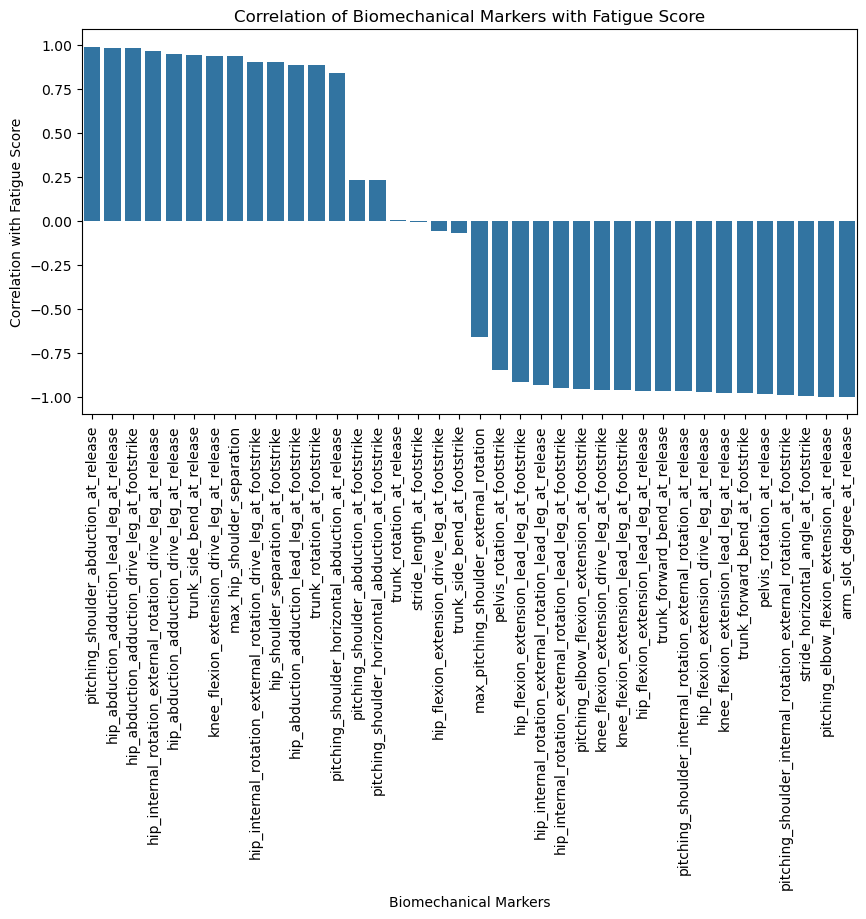


Feature Importance:
                                               Feature  Coefficient  \
35                         arm_slot_degree_at_release    -0.029230   
22        pitching_elbow_flexion_extension_at_release    -0.175050   
17              stride_horizontal_angle_at_footstrike    -0.035307   
19             pitching_shoulder_abduction_at_release     0.066184   
3   pitching_shoulder_internal_rotation_external_r...    -0.091764   
34                         pelvis_rotation_at_release    -0.149002   
27        hip_abduction_adduction_lead_leg_at_release     0.084240   
6     hip_abduction_adduction_drive_leg_at_footstrike     0.023763   
13                   trunk_forward_bend_at_footstrike    -0.021265   
30         knee_flexion_extension_lead_leg_at_release    -0.033322   
23         hip_flexion_extension_drive_leg_at_release    -0.009527   
21  pitching_shoulder_internal_rotation_external_r...    -0.002567   
31                      trunk_forward_bend_at_release    -0.093712  

In [17]:
# Plot correlations
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.xlabel("Biomechanical Markers")
plt.ylabel("Correlation with Fatigue Score")
plt.title("Correlation of Biomechanical Markers with Fatigue Score")
plt.show()

# Feature selection using linear regression
reg = LinearRegression()
reg.fit(features, target)

# Compute F-statistics and p-values
f_values, p_values = f_regression(features, target)

# Create a DataFrame to summarize results
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': reg.coef_,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='P-Value')

print("\nFeature Importance:\n", feature_importance)

# Identify significant markers (p < 0.05)
significant_markers = feature_importance[feature_importance['P-Value'] < 0.05]
print("\nSignificant Biomechanical Markers:", significant_markers['Feature'].tolist())


## Section 3: Using a Random Forest

### Summary:
Finally, I tried using a machine learning model to see if I could catch any intricate patterns not noticed by the linear regression model. No biomarkers stand out.

In [19]:
# drop the fatigue_score column to use the biomechanical markers as features
X = average_df.drop('fatigue_score', axis=1)
# set the target variable as the fatigue_score
y = average_df['fatigue_score']

# create a random forest regressor model
model = RandomForestRegressor()
# fit the model to the data
model.fit(X, y)

# get the feature importances from the model
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# print the feature importances
print(feature_importance)

knee_flexion_extension_drive_leg_at_footstrike                         0.059985
pitching_shoulder_internal_rotation_external_rotation_at_release       0.052512
max_hip_shoulder_separation                                            0.050596
pitching_shoulder_abduction_at_release                                 0.049602
max_pitching_shoulder_external_rotation                                0.049287
knee_flexion_extension_lead_leg_at_release                             0.041461
pitching_shoulder_horizontal_abduction_at_release                      0.041056
knee_flexion_extension_lead_leg_at_footstrike                          0.040648
trunk_side_bend_at_footstrike                                          0.040404
hip_abduction_adduction_drive_leg_at_footstrike                        0.039935
arm_slot_degree_at_release                                             0.039523
hip_flexion_extension_drive_leg_at_release                             0.039217
hip_abduction_adduction_drive_leg_at_rel